In [2]:
# General data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.corr()['median_house_value'].sort_values()

latitude             -0.144160
longitude            -0.045967
population           -0.024650
total_bedrooms        0.049686
households            0.065843
housing_median_age    0.105623
total_rooms           0.134153
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [6]:
df.dropna(axis=0, inplace=True)
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [7]:
y = df['median_house_value']
X = df.drop('median_house_value', axis=1)
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# use minMax scaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

(20433, 13) (20433,)


In [8]:
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],),input_dim = 13 ,activation='relu')) # (features,)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
# es = EarlyStopping(monitor='val_loss',
#                    mode='min',
#                    patience=50,
#                    restore_best_weights = True)

hist =model.fit(X_train, y_train,
            validation_split=0.2,
                    # callbacks=[es],
            epochs=50,
            batch_size=32,
            verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
409/409 [==============================] - 6s 4ms/step - loss: 46969372672.0000 - mae: 184889.7188 - val_loss: 19650367488.0000 - val_mae: 108725.4219
Epoch 2/50
409/409 [==

In [9]:
pred = model.predict(X_test)
trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

511/511 [==============================] - 1s 2ms/step
44977.27761194847
45859.59644196848


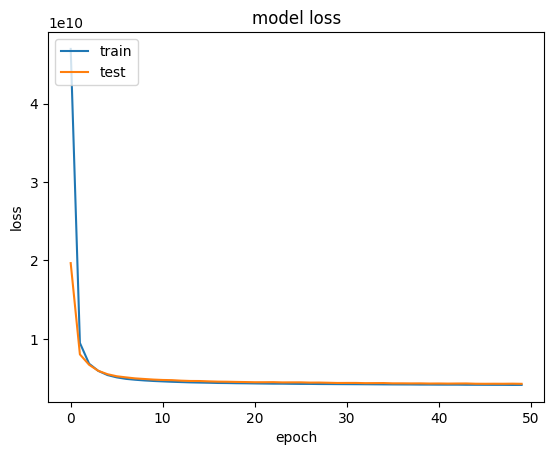

In [10]:
# plotting validation and training error
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
df = pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [79]:
df.drop(['body','home.dest','boat','cabin'],axis=1,inplace=True)
df.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

In [80]:
df['age'].fillna(round(df['age'].mean()),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [81]:
df.replace({'sex':{'male':0,'female':1}, 'embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [85]:
X = df.drop(columns = ['name','ticket','survived'],axis=1)
y=df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [86]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # output node

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
66/66 [==============================] - 2s 14ms/step - loss: 0.6732 - accuracy: 0.6638 - val_loss: 0.6384 - val_accuracy: 0.6412
Epoch 2/50
66/66 [==============================] - 0s 4ms/step - loss: 0.6203 - accuracy: 0.6925 - val_loss: 0.6240 - val_accuracy: 0.6336
Epoch 3/50
66/66 [==============================] - 0s 4ms/step - loss: 0.6307 - accuracy: 0.7077 - val_loss: 0.5916 - val_accuracy: 0.6641
Epoch 4/50
66/66 [==============================] - 0s 6ms/step - loss: 0.5602 - accuracy: 0.7230 - val_loss: 0.5630 - val_accuracy: 0.6870
Epoch 5/50
66/66 [==============================] - 0s 4ms/step - loss: 0.5608 - accuracy: 0.7259 - val_loss: 0.5964 - val_accuracy: 0.6985
Epoch 6/50
66/66 [==============================] - 0s 4ms/step - loss: 0.5534 - accuracy: 0.7287 - val_loss: 0.5391 - val_accuracy: 0.7176
Epoch 7/50
66/66 [==============================] - 0s 4ms/step - loss: 0.5135 - accuracy: 0.7689 - val_loss: 0.6156 - val_accuracy: 0.6603
Epoch 8/50
66/66 [=

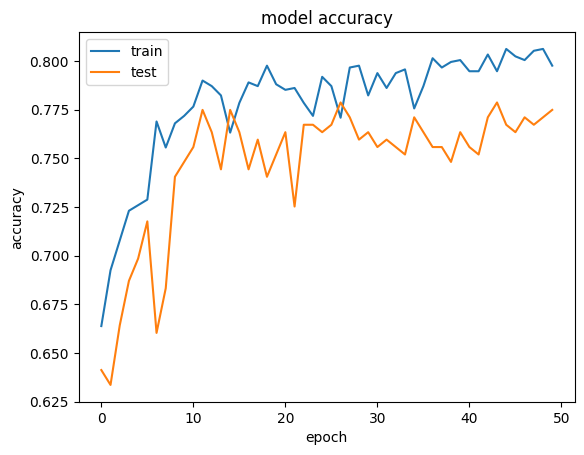

In [92]:
# plot the accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()